![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in BCN, Spain for 2022.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).

Here's a preview of that file:

In [ ]:
!head airbnb_data.csv

The column names are taken from the original documentation for this dataset.

In [2]:
# your code goes here
airbnb=pd.read_csv("airbnb_data.csv",sep=";")
airbnb.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3152,13385530,Cozy Private room near Sagrada Família,73883397,Alba,Sant Martí,el Camp de l'Arpa del Clot,41.4086,2.18355,Private room,"35,00 USD-.",1,3,2016-09-07,0.04,1,0,0,NaN
9961,43933455,BARCELONA | STYLISH APARTMENT FOR FOUR,299462,Stay U-Nique,Eixample,Sant Antoni,41.3817,2.15977,Entire home/apt,"205,00 USD-.",3,51,2022-09-04,2.89,126,41,40,HUTB-013093


In [3]:
# solution

#airbnb_df = pd.read_csv('data/airbnb_data.csv', sep=';')

#airbnb_df.head()

Hacemos info para ver de que tipo es cada columna. vemos que price aunque tenga numeros es object porq tiene la divisa

In [3]:
airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16920 non-null  int64  
 1   name                            16910 non-null  object 
 2   host_id                         16920 non-null  int64  
 3   host_name                       16918 non-null  object 
 4   neighbourhood_group             16920 non-null  object 
 5   neighbourhood                   16920 non-null  object 
 6   latitude                        16920 non-null  float64
 7   longitude                       16920 non-null  float64
 8   room_type                       16920 non-null  object 
 9   price                           16920 non-null  object 
 10  minimum_nights                  16920 non-null  int64  
 11  number_of_reviews               16920 non-null  int64  
 12  last_review                     

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 1. Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [4]:
# your code goes here
airbnb.isnull().sum()#Primero quiero ver cuantos valores nulos tengo por columna

id                                   0
name                                10
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3614
reviews_per_month                 3614
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5328
dtype: int64

In [5]:
airbnb.isnull().sum()/len(airbnb)*100 #Y ahora simplemente dividimos entre los valores que tiene el dataset

id                                 0.000000
name                               0.059102
host_id                            0.000000
host_name                          0.011820
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.359338
reviews_per_month                 21.359338
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           31.489362
dtype: float64

Podemos observar que las columnas con mas valores nulos son las de Licence, Reviews per month y calculated host_listing_counts, en el resto de columnas apenas hay valores nulos.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 2. Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [3]:
# your code goes here
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].replace(np.nan, 0)
#airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0) #Este metodo tambien funciona
airbnb.isnull().sum() #Comprobamos que ha funcionado

id                                   0
name                                10
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3614
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5328
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 3. Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [4]:
# your code goes here
airbnb.dropna(subset=['host_name'],inplace=True)#Borramos los valores nulos de "Host_name", IMPORTANTE el inplace

In [5]:
airbnb.isnull().sum()

id                                   0
name                                10
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3613
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5326
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 4. Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [6]:
# your code goes here
airbnb.dropna(subset=['last_review'],inplace=True)
airbnb.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3306
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 5. Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [10]:
# your code goes here
airbnb["host_id"]
airbnb = airbnb[airbnb.host_id != 0] #Con esto le decimos que queremos conservar todos los valores que sean distintos a 0
airbnb.sort_values(by=['host_id']) #Comprobamos que ha funcionado

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1913,6287375,"Single & Quite Room in Guinardó, Barcelona",3073,Ricard,Horta-Guinardó,el Guinardó,41.420310,2.173120,Private room,"26,00 USD-.",4,21,2016-12-01,0.24,1,0,0,NaN
12642,53824743,Superior bedroom with private bathroom up to 4,10704,Weflating,Eixample,la Dreta de l'Eixample,41.392690,2.169640,Private room,"157,00 USD-.",2,4,2022-07-17,0.47,23,249,4,AJ000490
7228,33067556,Two bedroom apartment downtown Barcelona,10704,Weflating,Eixample,la Dreta de l'Eixample,41.392070,2.170460,Entire home/apt,"239,00 USD-.",1,68,2022-09-07,1.67,23,254,37,HUTB-001989
7403,33062227,Superior three bedroom apartment City Center,10704,Weflating,Eixample,la Dreta de l'Eixample,41.392070,2.170460,Hotel room,"288,00 USD-.",1,100,2022-09-06,2.46,23,177,73,hutb-001986
7404,33062383,Sunny three bedroom penthouse apartment,10704,Weflating,Eixample,la Dreta de l'Eixample,41.392070,2.170460,Entire home/apt,"319,00 USD-.",1,73,2022-09-06,1.83,23,99,45,HUTB-001996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15244,693490926095935190,Habitación en el corazón de barcelona,475003399,Aída,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.404304,2.169113,Private room,"90,00 USD-.",1,5,2022-09-06,5.00,2,340,5,Exempt
15976,695396420258885279,Tiny House with swimming pool at Collserola Park,475312502,Laurent,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",41.442810,2.057350,Entire home/apt,"82,00 USD-.",1,8,2022-09-09,8.00,1,345,8,Exempt
15683,695720450202905003,Apartamento con un bonito patio y muy céntrico,475517271,Martina,Sants-Montjuïc,la Marina de Port,41.358146,2.123669,Entire home/apt,"60,00 USD-.",2,5,2022-09-07,5.00,1,3,5,Exempt
15384,704820188524948957,Beautiful double bedroom in the center Barcelona,477343286,Victor,Ciutat Vella,el Raval,41.384275,2.166592,Private room,"95,00 USD-.",2,1,2022-09-08,1.00,3,76,1,Exempt


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 6. Now cast this `last_review` column to `datetime`

In [11]:
# your code goes here
airbnb['last_review'] = pd.to_datetime(airbnb['last_review']) #Usamos la funcion to_datetime
airbnb.info() #Comprobamos que ha funcionado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13305 entries, 0 to 16919
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              13305 non-null  int64         
 1   name                            13301 non-null  object        
 2   host_id                         13305 non-null  int64         
 3   host_name                       13305 non-null  object        
 4   neighbourhood_group             13305 non-null  object        
 5   neighbourhood                   13305 non-null  object        
 6   latitude                        13305 non-null  float64       
 7   longitude                       13305 non-null  float64       
 8   room_type                       13305 non-null  object        
 9   price                           13305 non-null  object        
 10  minimum_nights                  13305 non-null  int64         
 11  nu

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 7. Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [12]:
# your code goes here
airbnb.drop_duplicates(subset=['host_name', 'price',"room_type"], keep='last',inplace=True)

In [13]:
airbnb.count()

id                                11115
name                              11111
host_id                           11115
host_name                         11115
neighbourhood_group               11115
neighbourhood                     11115
latitude                          11115
longitude                         11115
room_type                         11115
price                             11115
minimum_nights                    11115
number_of_reviews                 11115
last_review                       11115
reviews_per_month                 11115
calculated_host_listings_count    11115
availability_365                  11115
number_of_reviews_ltm             11115
license                            8370
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 8. Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `USD`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [7]:
# your code goes here
airbnb["price"] = airbnb['price'].str.replace('USD',' ') #Eliminamos USD
airbnb["price"] = airbnb['price'].str.replace('.',' ') #Eliminamos .
airbnb["price"] = airbnb['price'].str.replace('-',' ') #Eliminamos -
airbnb["price"] = airbnb['price'].str.replace(',','.') #Reemplazamos la coma por el punto
airbnb['price'] = airbnb['price'].astype(float) #Lo convertimos a float
airbnb.info() #Comprobamos que se ha convertido a float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13305 entries, 0 to 16919
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13305 non-null  int64  
 1   name                            13301 non-null  object 
 2   host_id                         13305 non-null  int64  
 3   host_name                       13305 non-null  object 
 4   neighbourhood_group             13305 non-null  object 
 5   neighbourhood                   13305 non-null  object 
 6   latitude                        13305 non-null  float64
 7   longitude                       13305 non-null  float64
 8   room_type                       13305 non-null  object 
 9   price                           13305 non-null  float64
 10  minimum_nights                  13305 non-null  int64  
 11  number_of_reviews               13305 non-null  int64  
 12  last_review                     

C:\Users\irene\AppData\Local\Temp/ipykernel_14452/3319930503.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb["price"] = airbnb['price'].str.replace('.',' ') #Eliminamos .


Precios = airbnb.loc[airbnb['price'].notnull(),['price']]
Precios["price"] = Precios['price'].str.replace('USD','') #Eliminamos USD
Precios["price"] = Precios['price'].str.replace('.','') #Eliminamos .
Precios["price"] = Precios['price'].str.replace('-','') #Eliminamos -
Precios["price"] = Precios['price'].str.replace(',','.') #Reemplazamos la coma por el punto
Precios['price'] = Precios['price'].astype(float)
Precios["price"]

https://betterprogramming.pub/5-different-ways-to-remove-specific-characters-from-a-string-in-python-b0e081839ab9


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 9. Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [10]:
# your code goes here
#Si la columna neighbourhood_group comparte valor con neighbouhood entonces se trata de un barrio, si no comparte es borough
#tenemos que crear dos listas
airbnb['neighbourhood_group'] = airbnb['neighbourhood_group'].astype(str)
airbnb["neighbourhood"]= airbnb['neighbourhood'].astype(str)
Borough=(airbnb[airbnb['neighbourhood_group'].isin(airbnb['neighbourhood']) == True])
airbnb.shape

(13305, 18)

In [17]:
Borough.shape
Borough.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15924,52462248,Large room with private bathroom. Baroque style.,95304948,Tatyana,Sant Andreu,el Bon Pastor,41.44510,2.22252,Private room,50.0,3,21,2022-08-31,1.89,4,337,21,Exempt
16473,25438996,Despacho/Apartamento privado muy tranquilo.Wif...,192028520,Jose,Sant Andreu,el Bon Pastor,41.43407,2.21517,Entire home/apt,87.0,2,220,2022-08-27,4.49,1,153,57,NaN
16077,34803457,Habitacion privada a 25minutos de la playa...,262395595,Mari,Sant Andreu,el Bon Pastor,41.44635,2.22606,Private room,25.0,1,32,2021-06-25,0.80,1,13,0,Hutb123456


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 10. Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [20]:
# your code goes here

airbnb["availability_365"]=np.where(airbnb["availability_365"] > 0, airbnb["availability_365"],airbnb["availability_365"] * -1) 
airbnb.sort_values(by=['availability_365'])["availability_365"] 
#Hemos eliminado modificado los valores negativos convirtiendolos a positivos y observamos que no hay valores mayores a 365

7674       0
4476       0
4485       0
4486       0
4497       0
        ... 
6640     365
9022     365
6748     365
16177    365
16596    365
Name: availability_365, Length: 11115, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 11. Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.
Pasos:

In [20]:
# your code goes here

host_reviews = airbnb[['host_name',"number_of_reviews"]]#Creo un dataset con solo esas dos columnas para verlo mas claro
suma_reviews=host_reviews.groupby(['host_name'],as_index=False).agg(suma = ('number_of_reviews','sum'))
most_reviews=suma_reviews.sort_values(by=["suma"],ascending=False).head(10)
most_reviews

,host_name,suma
1312,Jordi,8295
2511,Stay U-Nique,8054
185,Angel,5939
1034,Habitat Apartments,5849
2778,Xavier,5355
819,Eva & Jacques,5281
2098,Olala Homes,5037
56,Albert,5027
615,David,4621
82,Alex,4620


#### Visualizing most_reviews

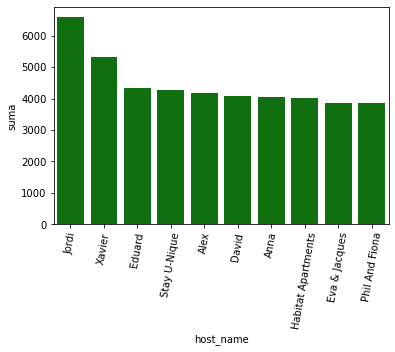

In [22]:
sns.barplot(data=most_reviews,x="host_name",y="suma",color="g")
plt.xticks(rotation = 80)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 12. Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [23]:
# your code goes here
df_ordenado_prices = airbnb.sort_values(by="price",ascending=False).copy() #Creamos una variable con los precios ordenados
df_ordenado_prices.reset_index(drop=True, inplace=True) #Modificamos los indices
expensive_listing_df=df_ordenado_prices.iloc[:100] #Usamos iloc para que nos coja las 100 primeras filas, que ya han sido ordenadas
expensive_listing_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,14484042,Habitacion enorme muy bien situada,63047696,Alvaro,Eixample,la Nova Esquerra de l'Eixample,41.38261,2.14987,Private room,90000.0,1,1,2016-09-20,0.01,1,0,0,NaN
1,25927238,individual room/ habitación individual,179317378,Eric,Horta-Guinardó,el Guinardó,41.42154,2.17763,Private room,63917.0,1124,1,2019-02-22,0.02,1,87,0,Exempt
2,40561327,"Habitación Cuádruple, en el corazón de Barcelona",216706365,Hotel,Ciutat Vella,el Raval,41.38186,2.16886,Private room,9999.0,1,48,2022-08-26,1.52,3,0,35,HUTB-225302
3,43479394,"Hotel Mosaic, Inside Double Room",340466110,ONA Hotels,Eixample,la Dreta de l'Eixample,41.39147,2.16259,Private room,9200.0,1,1,2021-05-31,0.06,5,365,0,HB-004622
4,43483536,"Hotel Arya, Double Room with Balcony",340465932,Ona Hotels,Les Corts,la Maternitat i Sant Ramon,41.37648,2.12390,Private room,9100.0,1,1,2021-08-16,0.08,5,0,0,HB-004622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18446890,"BCN CENTER, up to 6!",5608910,Helena,Eixample,la Dreta de l'Eixample,41.39191,2.16888,Entire home/apt,675.0,2,3,2018-06-03,0.05,5,364,0,HUTB-005504
96,18564914,Fantastic big Apartment with Balcony!,750385,Casa Consell,Eixample,la Dreta de l'Eixample,41.39216,2.16729,Entire home/apt,674.0,1,75,2022-08-28,1.19,3,95,12,HUTB-003418
97,23012707,7 Bedroom apartment in city centre- Classic Style,170513081,Georgina,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.38706,2.17670,Entire home/apt,671.0,2,93,2022-08-21,1.67,20,326,17,HUTB-000985
98,40767970,chs123w LARGE GROUPFLAT LAS RAMBLAS-FIRA BARCE...,1447144,Acomodis Apartments,Sants-Montjuïc,el Poble Sec,41.37392,2.16786,Entire home/apt,664.0,1,1,2020-02-20,0.03,127,365,0,HUTB-002498


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 13. Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [24]:
# your code goes here
expensive_listing_df["neighbourhood"].value_counts()

la Dreta de l'Eixample                          28
el Raval                                        10
el Barri Gòtic                                   6
la Vila de Gràcia                                5
la Sagrada Família                               5
Sant Antoni                                      5
la Vila Olímpica del Poblenou                    4
Sant Pere, Santa Caterina i la Ribera            3
la Maternitat i Sant Ramon                       3
el Poble Sec                                     3
Diagonal Mar i el Front Marítim del Poblenou     3
la Marina de Port                                3
Sant Gervasi - Galvany                           2
l'Antiga Esquerra de l'Eixample                  2
les Corts                                        2
el Parc i la Llacuna del Poblenou                2
la Bordeta                                       1
la Salut                                         1
Pedralbes                                        1
el Besòs i el Maresme          

#### Visualizing neighbourhoods

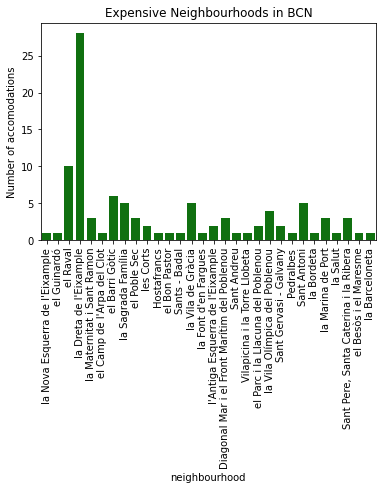

In [25]:
sns.countplot(data=expensive_listing_df,x="neighbourhood",color="g")
plt.xticks(rotation = 90)
plt.ylabel("Number of accomodations")
plt.title("Expensive Neighbourhoods in BCN")
plt.show()

#Aqui es mejor ordenar antes de graficar

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 14. Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [22]:
# your code goes here
listings= airbnb.groupby(["neighbourhood"])["neighbourhood"].count()
most_listings=listings.sort_values(axis=0,ascending=False).iloc[:10]
most_listings
most_listings = pd.DataFrame([[key, most_listings[key]] for key in most_listings.keys()], columns=['neighbourhood', 'Amount'])
most_listings
#Contamos las veces que aparece cada barrio en el dataset le ponemos head para que aparezcan las 10 primeras apariciones iloc[:10]

,neighbourhood,Amount
0,la Dreta de l'Eixample,1639
1,el Raval,947
2,la Sagrada Família,786
3,el Barri Gòtic,771
4,la Vila de Gràcia,720
5,"Sant Pere, Santa Caterina i la Ribera",705
6,l'Antiga Esquerra de l'Eixample,662
7,Sant Antoni,661
8,el Poble Sec,637
9,la Nova Esquerra de l'Eixample,468


In [126]:
#x = airbnb["neighbourhood"].value_counts().iloc[:10]

#### Visualizing neighbourhoods

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

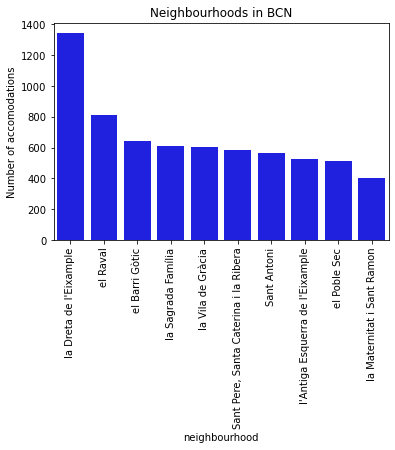

In [125]:
sns.barplot(data=most_listings,x="neighbourhood",y="Amount",color="b")
plt.xticks(rotation = 90)
plt.ylabel("Number of accomodations")
plt.title("Neighbourhoods in BCN")
plt.show()
